In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
from customplotting.general import plot_xy, save_fig
from functions import *

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
# continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence(t, k1):
    def model(n, t):
        k2 = 2e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 14), 50)
    n = odeint(model, n0, t)
    k2 = 2e-10
    pl = k2 * (n ** 2)
    return pl

In [47]:
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl = photoluminescence(t = np.linspace(0,1000)*1e-9, k1= np.logspace(5, 7, 50))
pl

array([[2.00000000e+18, 2.00000000e+18, 2.00000000e+18, ...,
        2.00000000e+18, 2.00000000e+18, 2.00000000e+18],
       [1.99023002e+18, 1.98942986e+18, 1.98855121e+18, ...,
        1.42500419e+18, 1.37830167e+18, 1.32875930e+18],
       [1.98051171e+18, 1.97891984e+18, 1.97717258e+18, ...,
        1.01543732e+18, 9.49977901e+17, 8.82921137e+17],
       ...,
       [1.59210383e+18, 1.56254993e+18, 1.53071392e+18, ...,
        2.48434884e+11, 5.18918093e+10, 9.28818361e+09],
       [1.58446562e+18, 1.55443884e+18, 1.52210676e+18, ...,
        1.77143292e+11, 3.57879252e+10, 6.17543715e+09],
       [1.57686682e+18, 1.54637274e+18, 1.51355104e+18, ...,
        1.26309746e+11, 2.46816527e+10, 4.10586462e+09]])

In [48]:
#x values of time
t = np.linspace(0,1000)*1e-9
t

array([0.00000000e+00, 2.04081633e-08, 4.08163265e-08, 6.12244898e-08,
       8.16326531e-08, 1.02040816e-07, 1.22448980e-07, 1.42857143e-07,
       1.63265306e-07, 1.83673469e-07, 2.04081633e-07, 2.24489796e-07,
       2.44897959e-07, 2.65306122e-07, 2.85714286e-07, 3.06122449e-07,
       3.26530612e-07, 3.46938776e-07, 3.67346939e-07, 3.87755102e-07,
       4.08163265e-07, 4.28571429e-07, 4.48979592e-07, 4.69387755e-07,
       4.89795918e-07, 5.10204082e-07, 5.30612245e-07, 5.51020408e-07,
       5.71428571e-07, 5.91836735e-07, 6.12244898e-07, 6.32653061e-07,
       6.53061224e-07, 6.73469388e-07, 6.93877551e-07, 7.14285714e-07,
       7.34693878e-07, 7.55102041e-07, 7.75510204e-07, 7.95918367e-07,
       8.16326531e-07, 8.36734694e-07, 8.57142857e-07, 8.77551020e-07,
       8.97959184e-07, 9.18367347e-07, 9.38775510e-07, 9.59183673e-07,
       9.79591837e-07, 1.00000000e-06])

In [31]:
#weighted sum of photoluminescence data
pl_sum = pl.sum(axis=-1)
pl_sum

array([1.00000000e+20, 9.17956819e+19, 8.50846822e+19, 7.95134774e+19,
       7.48221338e+19, 7.08179441e+19, 6.73567964e+19, 6.43299391e+19,
       6.16545313e+19, 5.92668565e+19, 5.71174222e+19, 5.51673992e+19,
       5.33860175e+19, 5.17486501e+19, 5.02353925e+19, 4.88300023e+19,
       4.75191023e+19, 4.62915762e+19, 4.51381075e+19, 4.40508245e+19,
       4.30230256e+19, 4.20489637e+19, 4.11236773e+19, 4.02428554e+19,
       3.94027308e+19, 3.85999925e+19, 3.78317159e+19, 3.70953056e+19,
       3.63884472e+19, 3.57090690e+19, 3.50553090e+19, 3.44254874e+19,
       3.38180841e+19, 3.32317184e+19, 3.26651330e+19, 3.21171795e+19,
       3.15868062e+19, 3.10730475e+19, 3.05750148e+19, 3.00918884e+19,
       2.96229106e+19, 2.91673799e+19, 2.87246449e+19, 2.82941002e+19,
       2.78751821e+19, 2.74673646e+19, 2.70701561e+19, 2.66830970e+19,
       2.63057563e+19, 2.59377295e+19])

In [46]:
#weighted average og the photoluminescence data
pl_avg = np.average(pl, weights=pl_sum, axis=-1)
pl_avg

array([2.00000000e+18, 1.88520718e+18, 1.78920508e+18, 1.70768805e+18,
       1.63747306e+18, 1.57618623e+18, 1.52204086e+18, 1.47367924e+18,
       1.43005945e+18, 1.39037375e+18, 1.35398951e+18, 1.32040608e+18,
       1.28922315e+18, 1.26011740e+18, 1.23282503e+18, 1.20712876e+18,
       1.18284792e+18, 1.15983096e+18, 1.13794969e+18, 1.11709476e+18,
       1.09717225e+18, 1.07810090e+18, 1.05980993e+18, 1.04223733e+18,
       1.02532844e+18, 1.00903485e+18, 9.93313449e+17, 9.78125693e+17,
       9.63436952e+17, 9.49215998e+17, 9.35434565e+17, 9.22066981e+17,
       9.09089850e+17, 8.96481788e+17, 8.84223194e+17, 8.72296051e+17,
       8.60683759e+17, 8.49370984e+17, 8.38343531e+17, 8.27588233e+17,
       8.17092848e+17, 8.06845974e+17, 7.96836975e+17, 7.87055907e+17,
       7.77493462e+17, 7.68140911e+17, 7.58990057e+17, 7.50033191e+17,
       7.41263055e+17, 7.32672803e+17])

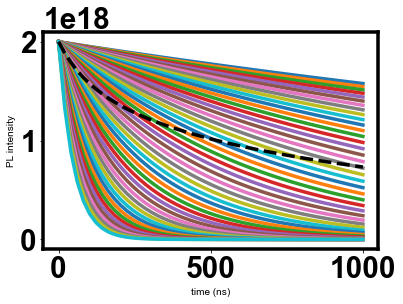

In [12]:
#plot of exponential decay of photoluminescence
plt.plot(t*1e9, pl)
plt.plot(t*1e9, pl_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [13]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 923.0821039726993
Beta = 0.5784553317658756
avg. tau (ns) = 1459.1710626763277


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [14]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 140.2352418118501
a1 = 0.3011122364312077
tau2 (ns) = 1556.218036296222
a2 = 0.6902156122384626
avg. tau (ns) = 1126.1184011780572


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [15]:
#triple exponential fitting of the average PL exponential decay
triple_exp = triple_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 74.4912150264
a1 = 0.13326428294830117
tau2 (ns) = 278.5165890436695
a2 = 0.26635629969628327
tau3 (ns) = 1944.5473862742053
a3 (ns) = 0.6001600005627227
avg. tau (ns) = 1251.4258106963869


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:180: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:201: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [16]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_avg/np.max(pl_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 1057.4859605532704
a = 0.8576270271574131
avg. tau (ns) = 1057.4859605532704


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


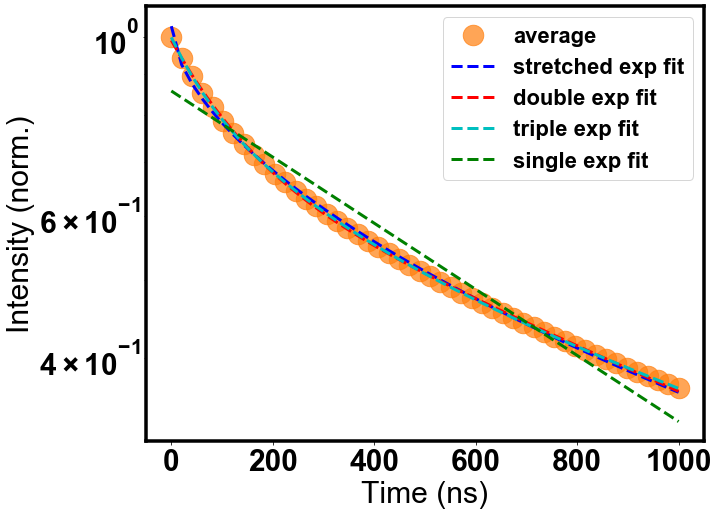

In [17]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_avg/np.max(pl_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

### Things to do next:

* Take lifetime for each of the decay 1/e of max PL
* Weighted average of these lifetimes
* Compare it to the avg_tau from fitting
* Plot the difference -->focus on comparing the tau 1 and tau 2 from biexp, and all others

(add noise to functions?)

* SRV for each decay and then wigthed average , compare to the SRV of avg tau from fitting and average decay

* Beta tells us about the k1 distribution --> show that this is the physical meaning a change in beta is reflexed in a change in k1 --> more homogeneous than beta is closer to 1 
1) k1 : uniform distribution --> should get beta values closer to 1
2) our skewed distribution --> lower beta
3) from 1e5 to 1e7 see if beta becomes closer to 0

### Calculation of theoretical tau : I = I0e(-t/tau) when t = tau : I = I0/e

In [19]:
#function to calculate the photoluminescence value divided by e used to calculated the theoretical lifetime which is the time when PL0/e
def PL_e(database):
    all_PL_e = np.array([])
    for row in database:
        PL_e = np.max(row)/np.e
        all_PL_e = np.append(all_PL_e, PL_e) 
    return all_PL_e

In [29]:
#application of the previous function to the "pl" dataset
PL_e_values = PL_e(pl)
PL_e_values

array([7.35758882e+17, 7.32164708e+17, 7.28589543e+17, 7.25033277e+17,
       7.21495799e+17, 7.17977000e+17, 7.14476770e+17, 7.10995002e+17,
       7.07531588e+17, 7.04086420e+17, 7.00659394e+17, 6.97250402e+17,
       6.93859341e+17, 6.90486107e+17, 6.87130595e+17, 6.83792704e+17,
       6.80472331e+17, 6.77169375e+17, 6.73883734e+17, 6.70615310e+17,
       6.67364001e+17, 6.64129711e+17, 6.60912340e+17, 6.57711791e+17,
       6.54527966e+17, 6.51360771e+17, 6.48210108e+17, 6.45075884e+17,
       6.41958003e+17, 6.38856371e+17, 6.35770897e+17, 6.32701486e+17,
       6.29648047e+17, 6.26610488e+17, 6.23588719e+17, 6.20582649e+17,
       6.17592188e+17, 6.14617248e+17, 6.11657740e+17, 6.08713576e+17,
       6.05784668e+17, 6.02870930e+17, 5.99972275e+17, 5.97088618e+17,
       5.94219872e+17, 5.91365955e+17, 5.88526780e+17, 5.85702266e+17,
       5.82892328e+17, 5.80096885e+17])

In [21]:
#function to calulate the index of the PL/e values in the "pl" database by looking at the nearest neighbor of the "PL_e_values" inside "pl"
def find_idx(array, value):
    return (np.abs(array - value)).argmin()

In [22]:
# array containing of all the indexes of "PL_e_values" in "pl" dataset 
index = np.array([])
for i in PL_e_values:
    a = find_idx(pl, i)
    index = np.append(index, a)
index

array([1076.,  583., 1423., 1870., 2467., 2069., 1324.,  928., 1920.,
       1027., 2119., 1622.,  292.,  437., 1374., 2169., 1821., 1523.,
        486., 2418., 1077.,  584., 1424., 1871.,  198., 2070., 1325.,
        929.,  781., 1921., 1028., 1772., 1623.,  341.,  732., 1971.,
        880., 2170., 1822., 1673.,  487., 2021., 1078.,  536.,  831.,
       1872., 2469., 2071.,  246., 1326.])

In [23]:
#array contaning the indexes corresponding to the time of the "PL_e_values" in the "pl" dataset. I calculate for each index the modulus by using "%" and see the rest of the division by 50 and see the position in the time 1D array
index_time = np.array([])
for i in index:
    index_time = np.append(index_time, int(i%50))
index_time

array([26., 33., 23., 20., 17., 19., 24., 28., 20., 27., 19., 22., 42.,
       37., 24., 19., 21., 23., 36., 18., 27., 34., 24., 21., 48., 20.,
       25., 29., 31., 21., 28., 22., 23., 41., 32., 21., 30., 20., 22.,
       23., 37., 21., 28., 36., 31., 22., 19., 21., 46., 26.])

In [24]:
#array of time values corresponding to the index in array "index_time"
lifetime = np.array([])
for i in index_time:
    lifetime = np.append(lifetime, t[int(i)]) 
lifetime

array([5.30612245e-07, 6.73469388e-07, 4.69387755e-07, 4.08163265e-07,
       3.46938776e-07, 3.87755102e-07, 4.89795918e-07, 5.71428571e-07,
       4.08163265e-07, 5.51020408e-07, 3.87755102e-07, 4.48979592e-07,
       8.57142857e-07, 7.55102041e-07, 4.89795918e-07, 3.87755102e-07,
       4.28571429e-07, 4.69387755e-07, 7.34693878e-07, 3.67346939e-07,
       5.51020408e-07, 6.93877551e-07, 4.89795918e-07, 4.28571429e-07,
       9.79591837e-07, 4.08163265e-07, 5.10204082e-07, 5.91836735e-07,
       6.32653061e-07, 4.28571429e-07, 5.71428571e-07, 4.48979592e-07,
       4.69387755e-07, 8.36734694e-07, 6.53061224e-07, 4.28571429e-07,
       6.12244898e-07, 4.08163265e-07, 4.48979592e-07, 4.69387755e-07,
       7.55102041e-07, 4.28571429e-07, 5.71428571e-07, 7.34693878e-07,
       6.32653061e-07, 4.48979592e-07, 3.87755102e-07, 4.28571429e-07,
       9.38775510e-07, 5.30612245e-07])

In [25]:
#lifetime in nanoseconds
lifetime*1e9

array([530.6122449 , 673.46938776, 469.3877551 , 408.16326531,
       346.93877551, 387.75510204, 489.79591837, 571.42857143,
       408.16326531, 551.02040816, 387.75510204, 448.97959184,
       857.14285714, 755.10204082, 489.79591837, 387.75510204,
       428.57142857, 469.3877551 , 734.69387755, 367.34693878,
       551.02040816, 693.87755102, 489.79591837, 428.57142857,
       979.59183673, 408.16326531, 510.20408163, 591.83673469,
       632.65306122, 428.57142857, 571.42857143, 448.97959184,
       469.3877551 , 836.73469388, 653.06122449, 428.57142857,
       612.24489796, 408.16326531, 448.97959184, 469.3877551 ,
       755.10204082, 428.57142857, 571.42857143, 734.69387755,
       632.65306122, 448.97959184, 387.75510204, 428.57142857,
       938.7755102 , 530.6122449 ])

In [26]:
#average lifetime using as weights the sum of pl arrays
avg_lifetime_calc= np.average(lifetime, weights= pl_sum,axis=-1)

Calculating time at PL/e in the average photoluminescence decay curve

In [43]:
# calculation of PL0/e 
PL_avg_e= np.max(pl_avg)/np.e
PL_avg_e

7.357588823428847e+17

In [44]:
# calculation of lifetime corresponding to PL0/e
lifetime_avg= t[(find_idx(pl, PL_avg_e))%50]
lifetime_avg

5.306122448979592e-07

<BarContainer object of 1 artists>

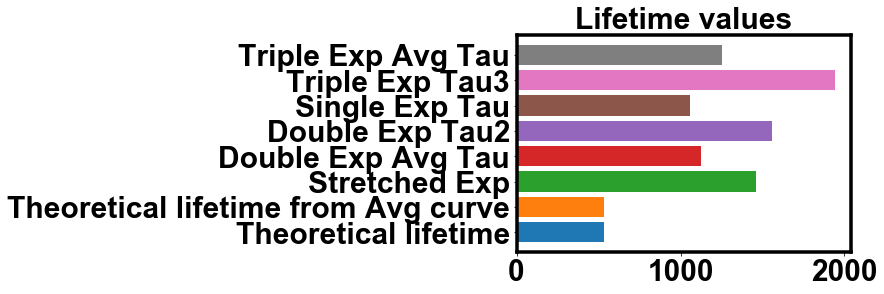

In [45]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure()
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("Theoretical lifetime", avg_lifetime_calc*1e9)
plt.barh("Theoretical lifetime from Avg curve", lifetime_avg*1e9)
plt.barh("Stretched Exp", stretched_exp[3]*1e9)
plt.barh("Double Exp Avg Tau", double_exp[4]*1e9)
plt.barh("Double Exp Tau2", double_exp[2]*1e9)
plt.barh("Single Exp Tau", single_exp[2]*1e9)
plt.barh("Triple Exp Tau3", triple_exp[4]*1e9)
plt.barh("Triple Exp Avg Tau", triple_exp[6]*1e9)

### k1 skewed gaussian distribution
Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [ ]:
# skewed gaussian distribution of k1 values
# search for log spaced skewed distribution
skew = skewnorm.rvs(a = 10, loc = 1e6, scale=10000000, size=50)

In [ ]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [ ]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 15), 50), t = np.linspace(0,1000)*1e-9)

In [ ]:
pl_skew_avg = pl_average(pl_skew)

In [ ]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)

In [ ]:
skew = skewnorm.rvs(a = 20, loc = 1e6, scale=1e7, size=50)

In [ ]:
plt.figure()
plt.tick_params(length=8)
plt.hist(skew)
plt.xlabel("K1 values (s-1)")
plt.xscale("log")

In [ ]:
pl_skew = photoluminescence(k1= skew, n0 = np.tile(np.power(10, 14), 50), t = np.linspace(0,1000)*1e-9)

In [ ]:
pl_skew_avg = pl_average(pl_skew)

In [ ]:
plt.plot(t*1e9, pl_skew)
plt.plot(t*1e9, pl_skew_avg,'k--', label="Average")
plt.xlabel('time (ns)')
plt.ylabel('PL intensity')
plt.show()

In [ ]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

In [ ]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

In [ ]:
triple_exp_skew = triple_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(triple_exp_skew[0]*1e9))
print("a1 = "+str(triple_exp_skew[1]))
print("tau2 (ns) = "+str(triple_exp_skew[2]*1e9))
print("a2 = "+str(triple_exp_skew[3]))
print("tau3 (ns) = "+str(triple_exp_skew[4]*1e9))
print("a3 (ns) = "+str(triple_exp_skew[5]))
print("avg. tau (ns) = "+str(triple_exp_skew[6]*1e9))

In [ ]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

In [ ]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_skew[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_skew[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, triple_exp_skew[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_skew[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend(fontsize=22)